# Modelos de Lenguaje

In [93]:
%matplotlib inline
import codecs

import numpy as np
import pandas as pd

In [77]:
with codecs.open('food.txt', 'r') as f:
    raw_corpus = []
    for line in f:
        raw_corpus.append('<s> {} </s>'.format(line.strip()))
raw_corpus = ' '.join(raw_corpus)
raw_corpus

'<s> can you tell me about any good cantonese restaurants close by </s> <s> mid priced thai food is what i’m looking for </s> <s> tell me about chez panisse </s> <s> can you give me a listng of the kinds of food that are available </s> <s> i’m looking for a good place to eat breakfast </s> <s> when is caffe venezia open during the day </s>'

In [78]:
corpus = np.array(raw_corpus.split(' '))
corpus

array(['<s>', 'can', 'you', 'tell', 'me', 'about', 'any', 'good',
       'cantonese', 'restaurants', 'close', 'by', '</s>', '<s>', 'mid',
       'priced', 'thai', 'food', 'is', 'what', 'i’m', 'looking', 'for',
       '</s>', '<s>', 'tell', 'me', 'about', 'chez', 'panisse', '</s>',
       '<s>', 'can', 'you', 'give', 'me', 'a', 'listng', 'of', 'the',
       'kinds', 'of', 'food', 'that', 'are', 'available', '</s>', '<s>',
       'i’m', 'looking', 'for', 'a', 'good', 'place', 'to', 'eat',
       'breakfast', '</s>', '<s>', 'when', 'is', 'caffe', 'venezia',
       'open', 'during', 'the', 'day', '</s>'],
      dtype='<U11')

## Modelo de Unigrama

In [79]:
unique, counts = np.unique(corpus, return_counts=True)
repetitions = dict(zip(unique, counts))

In [20]:
# P(A)
prob_A = repetitions['A'] / corpus.shape[0]
prob_A

0.33333333333333331

In [21]:
# P(B)
prob_B = repetitions['B'] / corpus.shape[0]
prob_B

0.33333333333333331

In [22]:
# P(C)
prob_C = repetitions['C'] / corpus.shape[0]
prob_C

0.33333333333333331

## Modelo de Bigramas

In [88]:
bigram_matrix = pd.DataFrame(index=unique, columns=unique)
bigram_matrix = bigram_matrix.fillna(0)
bigram_matrix = bigram_matrix.drop(['</s>'], axis=0)
bigram_matrix = bigram_matrix.drop(['<s>'], axis=1)
bigram_matrix

,</s>,a,about,any,are,available,breakfast,by,caffe,can,...,restaurants,tell,thai,that,the,to,venezia,what,when,you
<s>,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
about,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
any,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
are,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
available,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
breakfast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
by,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
caffe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
can,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
for i, w1 in enumerate(corpus):
    if w1 != '</s>':
        try:
            w2 = corpus[i + 1]
            if w2 != '<s>':
                bigram_matrix.at[w1, w2] += 1
        except IndexError:
            break
bigram_matrix

,</s>,a,about,any,are,available,breakfast,by,caffe,can,...,restaurants,tell,thai,that,the,to,venezia,what,when,you
<s>,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,1,0
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
about,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
any,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
are,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
available,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
breakfast,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
by,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
caffe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
can,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [92]:
for word in unique:
    try:
        bigram_matrix.loc[[word]] = (bigram_matrix.loc[[word]] + 1) / (repetitions[word] + unique.shape[0])
    except KeyError:
        continue

bigram_matrix

,</s>,a,about,any,are,available,breakfast,by,caffe,can,...,restaurants,tell,thai,that,the,to,venezia,what,when,you
<s>,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.061224,...,0.020408,0.040816,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.040816,0.020408
a,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222
about,0.022222,0.022222,0.022222,0.044444,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222
any,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727
are,0.022727,0.022727,0.022727,0.022727,0.022727,0.045455,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727
available,0.045455,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727
breakfast,0.045455,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727
by,0.045455,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727
caffe,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.045455,0.022727,0.022727,0.022727
can,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.066667


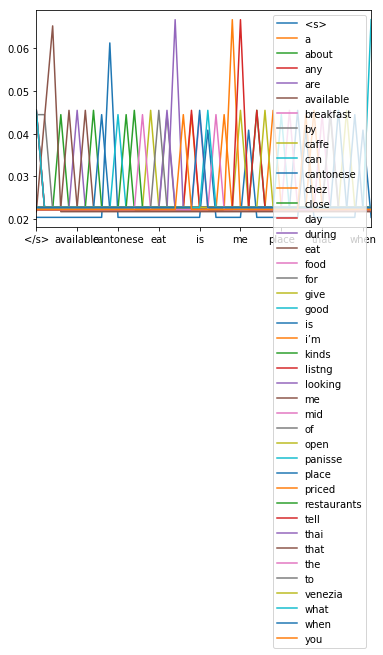

In [97]:
bigram_matrix.T.plot()

In [52]:
# P(ACB) = P(A)*P(C|A)*P(B|C)
prob_ACB = prob_A * bigram_matrix.at['A', 'C'] * bigram_matrix.at['C', 'B']
prob_ACB

0.037037037037037035

In [53]:
# P(CAB) = 
prob_CAB = prob_C * bigram_matrix.at['C', 'A'] * bigram_matrix.at['A', 'B']
prob_CAB

0.018518518518518517